## Project Phase 3 - Validation

#### Import modules

In [1]:
from pathlib import Path
import os
import sys
import time
import warnings

import pandas as pd

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/leon/Documents/Repos/Gesture-Recognition-Reading-Muscle-Activity


In [3]:
import utils.clustering as clustering
import utils.validation as validation

In [4]:
warnings.filterwarnings("ignore")

#### Set up to time script run time

In [5]:
start = time.time()

#### Configuration

In [6]:
SOLUTION_PICKLE_FILE_PATH = 'data/optimization_results.pkl'
DESIGN_FILE_PATH = 'data/emg_design.csv'
TARGET_FILE_PATH = 'data/emg_target.csv'
TARGET_ATTR = 'gesture class (0-3)'

#### The optimization results from clustering pipeline optimization

In [7]:
clustering_results_df = pd.read_pickle(SOLUTION_PICKLE_FILE_PATH)
clustering_results_df.reset_index(drop=True, inplace=True)
clustering_results_df

,algo,eps,dbscan_min_samples,n_clusters_found,validity_index,hopkins_statistic,umap_n_neighbors,umap_min_dist,umap_metric,umap_n_components,trustworthiness,fitted_dbscan,embedding,cluster_labels,n_clusters_db_score_is_min,n_clusters_ch_score_is_max,n_clusters_silhouette_score_is_max,silhouette_score,fitted_k_means
0,k_means,NaN,NaN,3,NaN,0.734961,7,0.00100,cosine,5,0.823645,NaN,"[[3.2748647, 7.6493006, 3.9626865, 4.479932, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.549104,"KMeans(n_clusters=3, n_init='auto', random_sta..."
1,k_means,NaN,NaN,3,NaN,0.761623,7,0.00100,cosine,10,0.823610,NaN,"[[3.227192, 7.637264, 3.9158268, 4.851348, 6.4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.549001,"KMeans(n_clusters=3, n_init='auto', random_sta..."
2,k_means,NaN,NaN,3,NaN,0.760266,7,0.00001,cosine,10,0.824708,NaN,"[[3.2835078, 7.658021, 3.8094757, 4.7666316, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.548391,"KMeans(n_clusters=3, n_init='auto', random_sta..."
3,k_means,NaN,NaN,3,NaN,0.763695,7,0.00001,cosine,15,0.824834,NaN,"[[3.2331347, 7.6844172, 3.920934, 4.8214865, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.547967,"KMeans(n_clusters=3, n_init='auto', random_sta..."
4,k_means,NaN,NaN,3,NaN,0.736636,7,0.00001,cosine,5,0.823768,NaN,"[[3.161631, 7.5509453, 3.8223517, 4.6232133, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.545115,"KMeans(n_clusters=3, n_init='auto', random_sta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,dbscan,0.115614,6.0,3,-0.736907,0.453044,42,0.10000,euclidean,2,0.593051,"DBSCAN(eps=0.1156137251191497, min_samples=6)","[[-0.36745512, 7.3653316], [-0.5968582, 7.0834...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
146,dbscan,0.152404,6.0,3,-0.743036,0.424897,17,0.10000,cosine,2,0.750826,"DBSCAN(eps=0.1524039997582118, min_samples=6)","[[2.2316277, 0.73641324], [2.1696315, 0.589929...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
147,dbscan,0.096328,6.0,2,-0.752965,0.449576,42,0.00100,euclidean,2,0.597704,"DBSCAN(eps=0.09632816797667515, min_samples=6)","[[0.5836985, 8.050481], [0.41431034, 7.96385],...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
148,dbscan,0.473131,6.0,13,-0.773474,0.332102,3,0.10000,cosine,2,0.755032,"DBSCAN(eps=0.473131018951767, min_samples=6)","[[9.46398, 3.5633922], [9.801375, 2.924061], [...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN


#### Select the Latent Manifold

In [8]:
best_k_means = None
best_k_means_index = None

if (clustering_results_df['algo'] == 'k_means').any():
    best_k_means, best_k_means_index = clustering.select_best_k_means_from_clustering_results(clustering_results_df)
print(best_k_means_index)
best_k_means

0


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [9]:
best_dbscan = None
best_dbscan_index = None

if (clustering_results_df['algo'] == 'dbscan').any():
    best_dbscan, best_dbscan_index = clustering.select_best_dbscan_from_clustering_results(clustering_results_df)
print(best_dbscan_index)
best_dbscan

54


DBSCAN(eps=1.0762764937608833, min_samples=6)

In [10]:
best_index = clustering.select_latent_manifold(clustering_results_df, best_k_means_index, best_dbscan_index)
best_index

0

In [11]:
latent_manifold_details = clustering.get_latent_manifold_details(clustering_results_df, best_index)
latent_manifold_details

,number of classes in data set,UMAP n_components,UMAP min_dist,UMAP n_neighbors,UMAP metric,trustworthiness,clustering algorithm,number of clusters found,validity index or silhouette score
0,4,5,0.001,7,cosine,0.823645,k_means,3,0.549104


#### Merge cap_x_df and y_df for comparison

In [12]:
cap_x_df = pd.read_csv(TARGET_FILE_PATH)
y_df = pd.read_csv(DESIGN_FILE_PATH)

In [13]:
merged_df = pd.merge(cap_x_df, y_df, on='id', how='left')
merged_df['pred_labels'] = clustering_results_df.loc[best_index, 'cluster_labels']
merged_df.rename(columns={TARGET_ATTR: 'target'}, inplace=True)

print(merged_df.shape)
merged_df.head()

(11678, 67)


,id,target,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,...,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8,pred_labels
0,0,0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,2
1,1,0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,2
2,2,0,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,2
3,3,0,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,2
4,4,0,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,2


#### Cluster validation using external indices

In [14]:
external_indices_df = validation.get_external_indices(
    merged_df, 
    clustering_results_df.loc[best_index, 'algo']
)
external_indices_df

rand_score:  0.6911573131695764
adjusted_rand_score:  0.33577302521594804
fowlkes_mallows_score:  0.5659413031876067
normalized_mutual_info_score:  0.4364350210693582
jaccard_score:  [0.02312382 0.00243161 0.01089439 0.        ]
f1_score:  [0.04520238 0.00485143 0.02155397 0.        ]
contingency_matrix:
 [[2419  220  271]
 [  23 2868   12]
 [  62 1149 1732]
 [ 306 2587   29]]
purity_score:  0.6010446994348347


,rand_score,adjusted_rand_score,fowlkes_mallows_score,normalized_mutual_info_score,jaccard_score,f1_score,purity_score,best_perm_labels_pred,best_contingency_matrix,non_noise_indices
0,0.691157,0.335773,0.565941,0.436435,"[0.02312381753205802, 0.0024316109422492403, 0...","[0.04520238339839737, 0.0048514251061249234, 0...",0.601045,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[2419, 220, 271], [23, 2868, 12], [62, 1149, ...",None


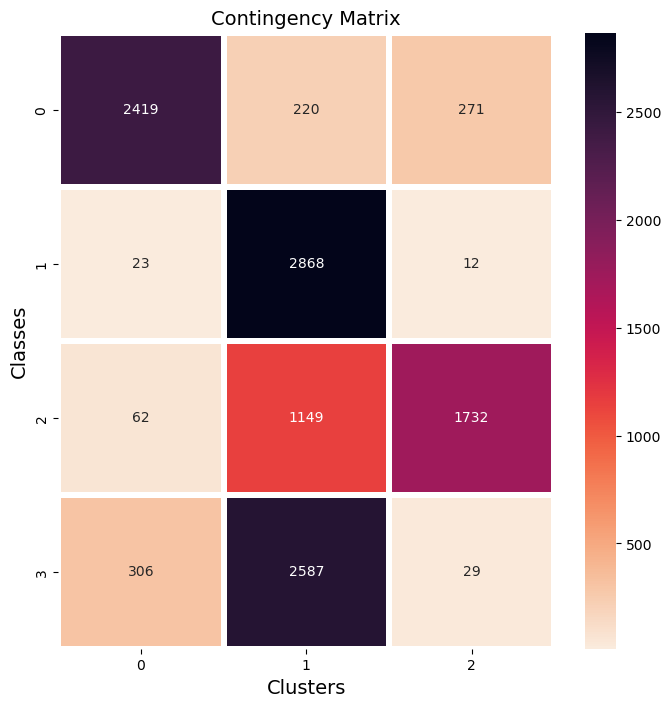

In [15]:
validation.plot_contingency_matrix(external_indices_df['best_contingency_matrix'].values[0])

#### Time to run script

In [16]:
end = time.time()
print(f'script run time: {(end - start)/60} minutes')

script run time: 0.0070159673690795895 minutes
